In [ ]:
from qtn.bimax import BiMax
from qtn.util import (boltzmann, emass, echarge, permittivity, cspeed, fperp, fp)
import numpy as np
import mpmath as mp
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
ant_len = 50      # m (monopole) 
ant_rad = 1.9e-4  # m
base_cap = 20e-12 # Farad
fbins = np.array([4000*1.0445**i for i in range(96)])

In [33]:
vsw=3.966e5
tc = 9.91 * echarge/boltzmann
t = 6.57
n = 0.026
tep = 9.91/9.62
fpe = 31.47e3

In [4]:
ne = 12.28e6
nc = ne/(1+n)
ldc = np.sqrt(permittivity * boltzmann * tc/ nc / echarge**2)
lrel = ant_len/ldc

In [5]:
p = BiMax(ant_len, ant_rad, base_cap)

In [6]:
wrelplot = fbins/fpe

In [43]:
g_s = np.array([p.gamma_shot(wrel, lrel, n, t, tc) for wrel in wrelplot])

In [44]:
def helper(wrel):
    """
    add precision control to bimax function.
    
    """
    if wrel > 1 and wrel < 1.2:
        mp.mp.dps = 40
    else:
        mp.mp.dps = 20
    return p.bimax(wrel, lrel, n, t, tc)

In [1]:
enoise = np.array([helper(wrel) for wrel in wrelplot])

NameError: name 'np' is not defined

In [46]:
pnoise = np.array([p.proton(wrel*np.sqrt(1+n), lrel, tep, tc, vsw) for wrel in wrelplot])

In [47]:
gamma = g_s[:, 0]
shot = g_s[:, 1]
vr2 = enoise + pnoise + shot

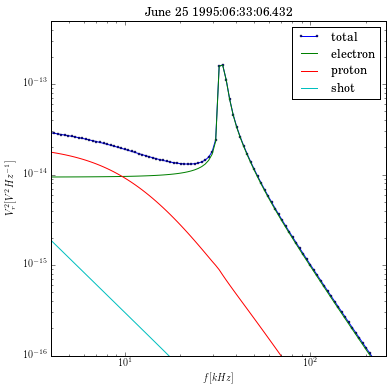

In [116]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
fig = plt.figure(figsize=[6, 6])
plt.plot(fbins/1000, vr2/gamma, 'o-', markersize=2, label='total')
plt.plot(fbins/1000, enoise/gamma, label='electron')
plt.plot(fbins/1000, pnoise/gamma, label='proton')
plt.plot(fbins/1000, shot/gamma, label='shot')
plt.xscale('log')
plt.yscale('log')
plt.xlim([4, 256])
plt.ylim([1e-16, 5e-13])
plt.xlabel(r'$f[kHz]$')
plt.ylabel(r'$V_r^2[V^2Hz^{-1}]$')
plt.title('June 25 1995:06:33:06.432')
plt.legend(loc='best')
plt.show()

In [71]:
fig.savefig('wind1.png', dpi=300)

In [72]:
from scipy.io.idl import readsav

In [74]:
m_dat=readsav('/Users/Tong/Google Drive/research/data/meudon_tnr/TNR_XY_ACE_19950625.sav')

In [78]:
m_data=m_dat['data']
mt = m_data['timeur8'][0]
mtag = m_data['time'][0]

In [88]:
mtag[5224]

b'25-JUN-1995, 06:33:07.904'

In [99]:
spec = m_data['spectra'][0][:, 5224]
spec = 10. ** (spec/10.)

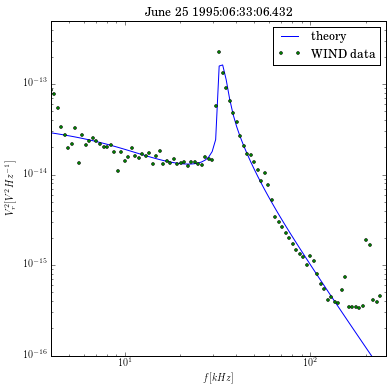

In [117]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
fig = plt.figure(figsize=[6, 6])
plt.plot(fbins/1000, vr2/gamma, label='theory')
#plt.plot(fbins/1000, enoise/gamma, label='electron')
#plt.plot(fbins/1000, pnoise/gamma, label='proton')
#plt.plot(fbins/1000, shot/gamma, label='shot')
plt.plot(fbins/1000, spec[:95], 'o', markersize=3, label='WIND data')
plt.xscale('log')
plt.yscale('log')
plt.xlim([4, 256])
plt.ylim([1e-16, 5e-13])
plt.xlabel(r'$f[kHz]$')
plt.ylabel(r'$V_r^2[V^2Hz^{-1}]$')
plt.title('June 25 1995:06:33:06.432')
plt.legend(loc='best')
plt.show()

In [118]:
fig.savefig('wind1.png', dpi=300)

In [46]:
vsw=7.61e5
tc = 11.53 * echarge/boltzmann
t = 5.57
n = 0.059
tep = 11.53/47.49
fpe = 22.24e3
te = tc * (1 + n)/(1 + n/t)
print(te)
te = te

140209.15454394044


In [82]:
ne = 6.13e6
nc = ne/(1+n)
ldc = np.sqrt(permittivity * boltzmann * tc/ nc / echarge**2)
lc = ant_len/ldc
print(lc)
lde = np.sqrt(permittivity * boltzmann * te/ ne / echarge**2)
le = ant_len/lde
print(le)

4.76560926085
4.79078253652


In [75]:
p = BiMax(ant_len, ant_rad, base_cap)

In [76]:
wrelplot = fbins/fpe

In [51]:
#wrelplot = wrelplot[0:2]

In [13]:
g_s = np.array([p.gamma_shot(wrel, lrel, n, t, tc) for wrel in wrelplot])

In [77]:
wrelplot[0]

0.17985611510791366

In [81]:
wrel = wrelplot[0]
print(p.gamma_shot(wrel, lrel, n, t, tc))
print(p.proton(wrel, lc, tep, tc, vsw))
print(p.proton(wrel, le, tep, te, vsw))

[mpf('1.3318924832216414'), mpf('1.4168270136603502e-15')]
2.7102680810816977e-14
2.7977052495619694e-14


In [96]:
p.proton(0.1, le, tep, te, vsw)

3.067830642225272e-14

In [23]:
def helper(wrel):
    """
    add precision control to bimax function.
    
    """
    if wrel > 1 and wrel < 1.2:
        mp.mp.dps = 40
    else:
        mp.mp.dps = 20
    return p.bimax(wrel, lrel, n, t, tc)

In [24]:
enoise = np.array([helper(wrel) for wrel in wrelplot])

In [60]:
pnoise = np.array([p.proton(wrel*np.sqrt(1+n), lrel, tep, tc, vsw) for wrel in wrelplot])

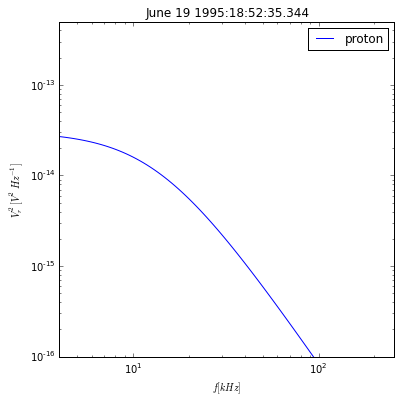

In [61]:
fig = plt.figure(figsize=[6, 6])
plt.plot(fbins/1000, pnoise, label='proton')
plt.xscale('log')
plt.yscale('log')
plt.xlim([4, 256])
plt.ylim([1e-16, 5e-13])
plt.xlabel(r'$f[kHz]$')
plt.ylabel(r'$V_r^2[V^2Hz^{-1}]$')
plt.title('June 19 1995:18:52:35.344')
plt.legend(loc='best')
plt.show()

In [16]:
gamma = g_s[:, 0]
shot = g_s[:, 1]
vr2 = enoise + pnoise + shot

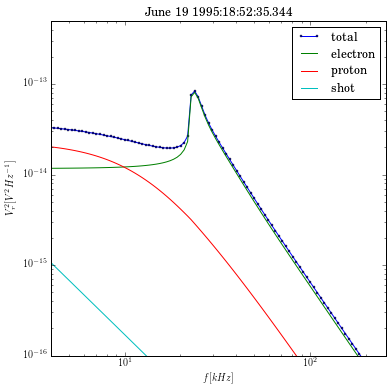

In [44]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
fig = plt.figure(figsize=[6, 6])
plt.plot(fbins/1000, vr2/gamma, 'o-', markersize=2, label='total')
plt.plot(fbins/1000, enoise/gamma, label='electron')
plt.plot(fbins/1000, pnoise/gamma, label='proton')
plt.plot(fbins/1000, shot/gamma, label='shot')
plt.xscale('log')
plt.yscale('log')
plt.xlim([4, 256])
plt.ylim([1e-16, 5e-13])
plt.xlabel(r'$f[kHz]$')
plt.ylabel(r'$V_r^2[V^2Hz^{-1}]$')
plt.title('June 19 1995:18:52:35.344')
plt.legend(loc='best')
plt.show()

In [45]:
fig.savefig('wind1.png', dpi=300)

In [19]:
from scipy.io.idl import readsav

In [20]:
m_dat=readsav('/Users/Tong/Google Drive/research/data/meudon_tnr/TNR_XY_ACE_19950619.sav')

In [21]:
m_data=m_dat['data']
mt = m_data['timeur8'][0]
mtag = m_data['time'][0]

In [69]:
mtag[15267]

b'19-JUN-1995, 18:52:36.816'

In [74]:
spec = m_data['spectra'][0][:, 15266]
spec = 10. ** (spec/10.)

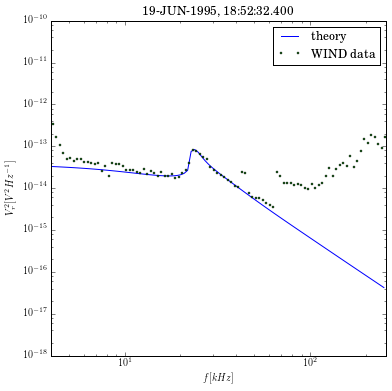

In [77]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
fig = plt.figure(figsize=[6, 6])
plt.plot(fbins/1000, vr2/gamma, label='theory')
#plt.plot(fbins/1000, enoise/gamma, label='electron')
#plt.plot(fbins/1000, pnoise/gamma, label='proton')
#plt.plot(fbins/1000, shot/gamma, label='shot')
plt.plot(fbins/1000 * 1.02, spec, 'o', markersize=2, label='WIND data')
plt.xscale('log')
plt.yscale('log')
plt.xlim([4, 256])
plt.ylim([1e-18, 1e-10])
plt.xlabel(r'$f[kHz]$')
plt.ylabel(r'$V_r^2[V^2Hz^{-1}]$')
plt.title('19-JUN-1995, 18:52:32.400')
plt.legend(loc='best')
plt.show()

In [78]:
fig.savefig('wind1.png', dpi=300)